<a href="https://colab.research.google.com/github/arnabd2002/AI_experiments/blob/master/VisualizeCNN_layers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import IPython.display as ipd
import numpy as np
import os
from tensorflow.keras.datasets import  fashion_mnist
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing.image import load_img
import tensorflow as tf

In [2]:
gpu_devices=tf.config.list_physical_devices("GPU")
tf.config.experimental.set_memory_growth(gpu_devices[0],True)

In [3]:
THRESHOLD=0.99
class EarlyStoppingCallBack(tf.keras.callbacks.Callback):
    
    def on_epoch_end(self,epoch,logger=None):
        if logger.get("acc")>=THRESHOLD:
            print("Desired accuracy reached. Stopping training!!")
            self.model.stop_training=True

In [4]:
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()
x_train.shape,y_train.shape,x_test.shape,y_test.shape

4423680/4422102 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [5]:
x_train=x_train.reshape(60000,28,28,1)
x_train=x_train/255.
x_test=x_test.reshape(10000,28,28,1)
x_test=x_test/255.

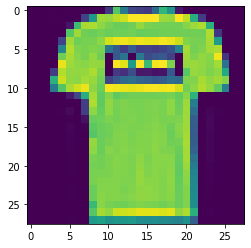

In [6]:
plt.imshow(x_train[1].reshape(28,28))

In [7]:
input_shape=(28,28,1)
num_classes=10

In [8]:
model=Sequential()
model.add(Convolution2D(64,3,activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(2))
model.add(Convolution2D(128,3,activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(2))
model.add(Convolution2D(256,3,activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(2))
model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dropout(rate=0.20))
model.add(Dense(512,activation='relu'))
model.add(Dropout(rate=0.20))
model.add(Dense(256,activation='relu'))
model.add(Dropout(rate=0.20))
model.add(Dense(128,activation='relu'))
model.add(Dropout(rate=0.20))
model.add(Dense(num_classes,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 256)         295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 256)         0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0

In [9]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])

In [10]:
cb=EarlyStoppingCallBack()
hist=model.fit(x_train,y_train,epochs=100,callbacks=[cb],batch_size=100)

Epoch 1/100
600/600 [==============================] - 39s 17ms/step - loss: 0.6735 - acc: 0.7460
Epoch 2/100
600/600 [==============================] - 10s 17ms/step - loss: 0.4029 - acc: 0.8540
Epoch 3/100
600/600 [==============================] - 10s 17ms/step - loss: 0.3319 - acc: 0.8807
Epoch 4/100
600/600 [==============================] - 10s 17ms/step - loss: 0.2924 - acc: 0.8960
Epoch 5/100
600/600 [==============================] - 10s 17ms/step - loss: 0.2666 - acc: 0.9042
Epoch 6/100
600/600 [==============================] - 10s 17ms/step - loss: 0.2389 - acc: 0.9147
Epoch 7/100
600/600 [==============================] - 10s 17ms/step - loss: 0.2176 - acc: 0.9220
Epoch 8/100
600/600 [==============================] - 10s 17ms/step - loss: 0.2011 - acc: 0.9266
Epoch 9/100
600/600 [==============================] - 10s 17ms/step - loss: 0.1845 - acc: 0.9336
Epoch 10/100
600/600 [==============================] - 10s 17ms/step - loss: 0.1707 - acc: 0.9371
Epoch 11/100
600/60

KeyboardInterrupt: ignored

In [11]:
model.evaluate(x=x_test,y=y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.4257 - acc: 0.8894


[0.4257199764251709, 0.8894000053405762]

In [12]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['acc'])


NameError: ignored

9655


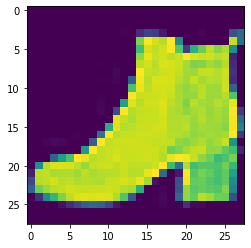

In [14]:
rndIdx=np.random.randint(len(x_test))
print(rndIdx)
plt.imshow(x_test[rndIdx].reshape(28,28))

In [ ]:
[layer.output for layer in model.layers if 'conv2d' in layer.name]

[<KerasTensor: shape=(None, 26, 26, 64) dtype=float32 (created by layer 'conv2d_20')>,
 <KerasTensor: shape=(None, 11, 11, 128) dtype=float32 (created by layer 'conv2d_21')>,
 <KerasTensor: shape=(None, 3, 3, 256) dtype=float32 (created by layer 'conv2d_22')>]

In [19]:
model_layer_outputs=[layer.output for layer in model.layers[:6]]

In [20]:
visual_model=Model(model.input,model_layer_outputs)
visual_model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 256)         295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 256)         0   

In [21]:
test=x_test[0].reshape(1,28,28,1)
feature_maps=visual_model.predict(test)
len(feature_maps)

6

(26, 26)


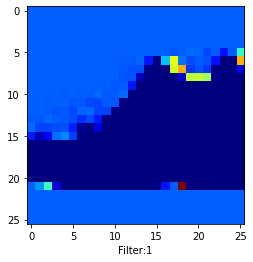

(26, 26)


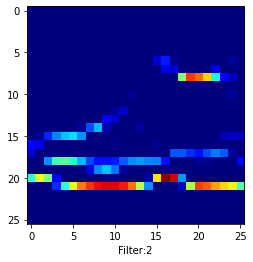

(26, 26)


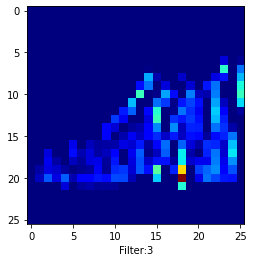

(26, 26)


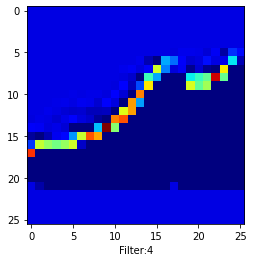

(26, 26)


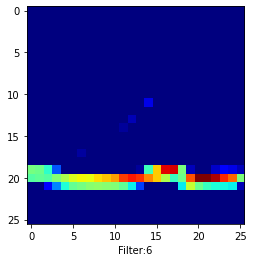

(26, 26)


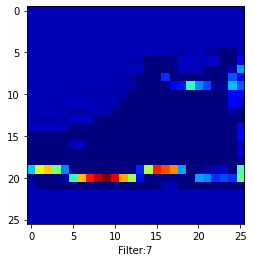

(26, 26)


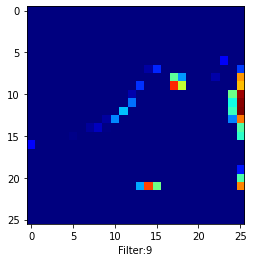

(26, 26)


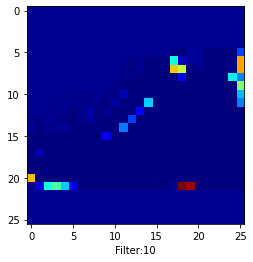

(26, 26)


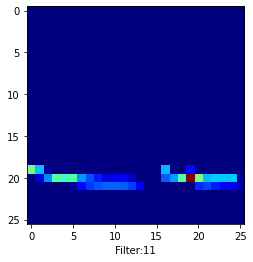

(26, 26)


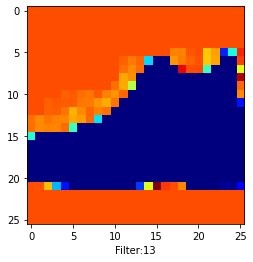

(26, 26)


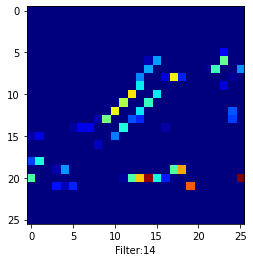

(26, 26)


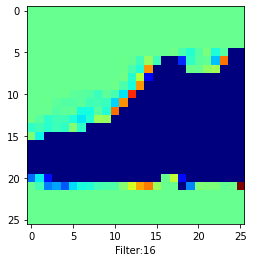

(26, 26)


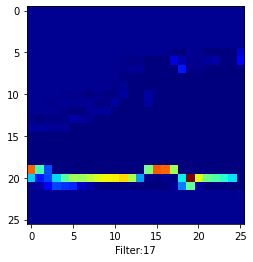

(26, 26)


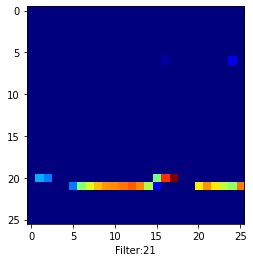

(26, 26)


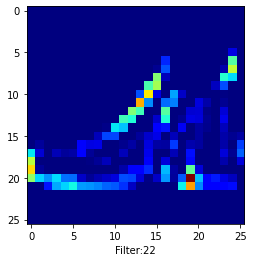

(26, 26)


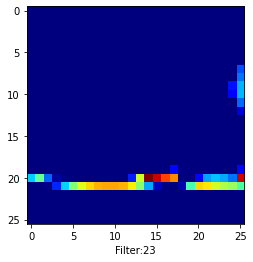

(26, 26)


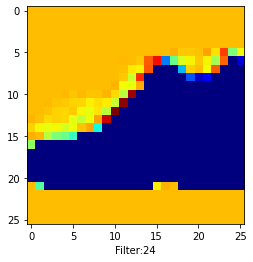

(26, 26)


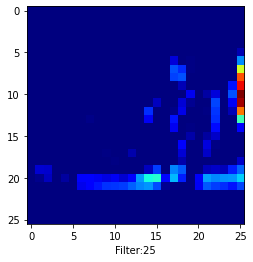

(26, 26)


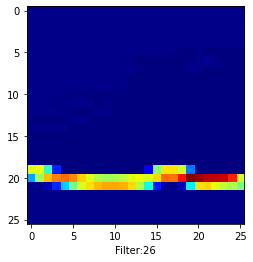

(26, 26)


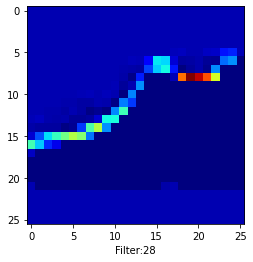

(26, 26)


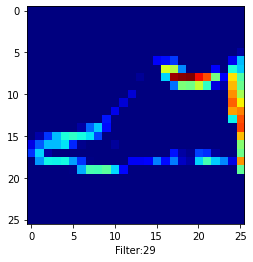

(26, 26)


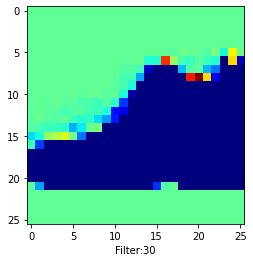

(26, 26)


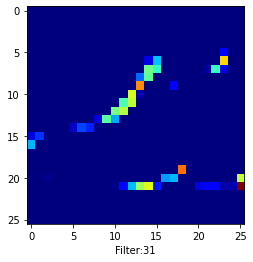

(26, 26)


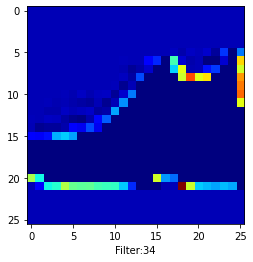

(26, 26)


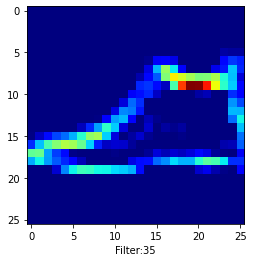

(26, 26)


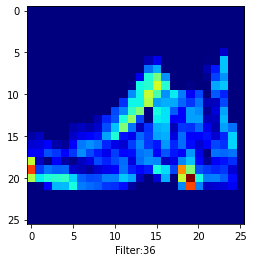

(26, 26)


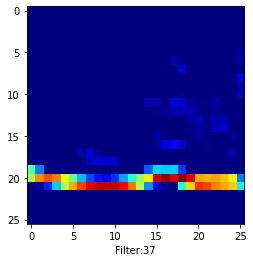

(26, 26)


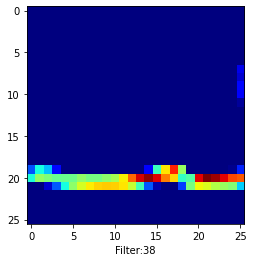

(26, 26)


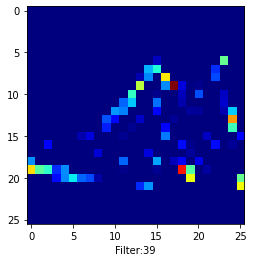

(26, 26)


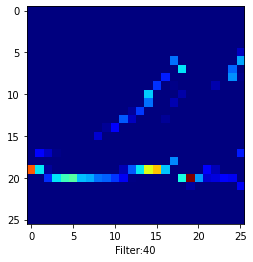

(26, 26)


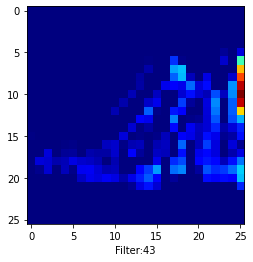

(26, 26)


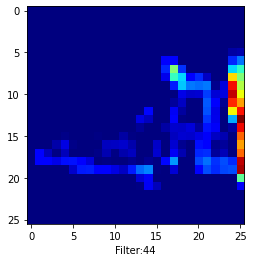

(26, 26)


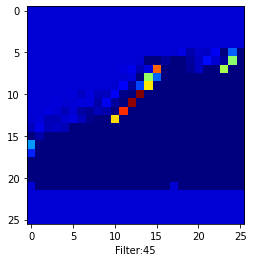

(26, 26)


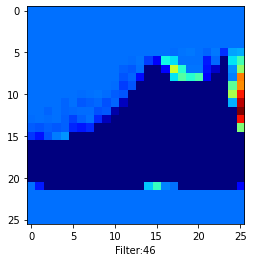

(26, 26)


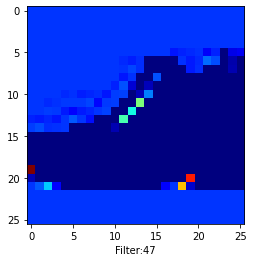

(26, 26)


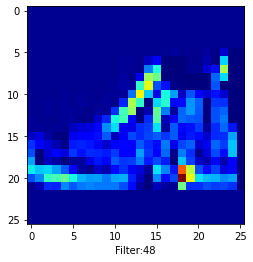

(26, 26)


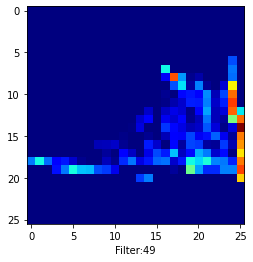

(26, 26)


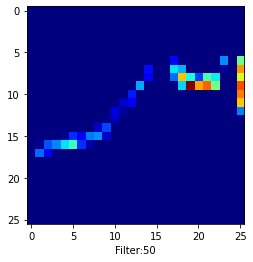

(26, 26)


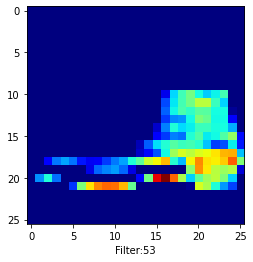

(26, 26)


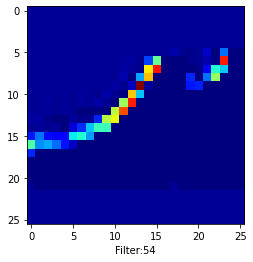

(26, 26)


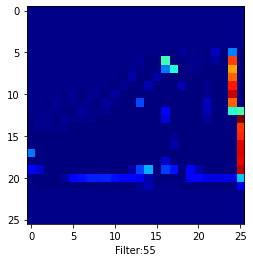

(26, 26)


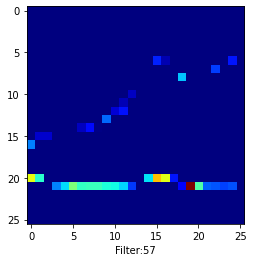

(26, 26)


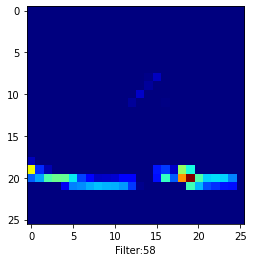

(26, 26)


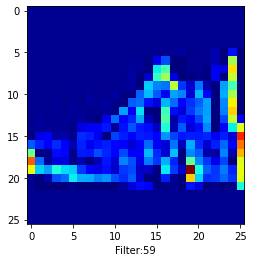

(26, 26)


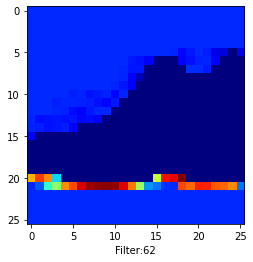

In [28]:
layer_idx=0
for i in range(feature_maps[layer_idx].shape[-1]):
  if np.sum(feature_maps[layer_idx][0,:,:,i])>=1:
    plt.imshow(feature_maps[layer_idx][0,:,:,i],cmap='jet')
    print(feature_maps[layer_idx][0,:,:,i].shape)
    plt.xlabel("Filter:"+str(i))
    plt.show()
  else:
    pass

In [25]:
np.argmax(model.predict(x_test[0].reshape(1,28,28,1))),y_test[0]

(9, 9)